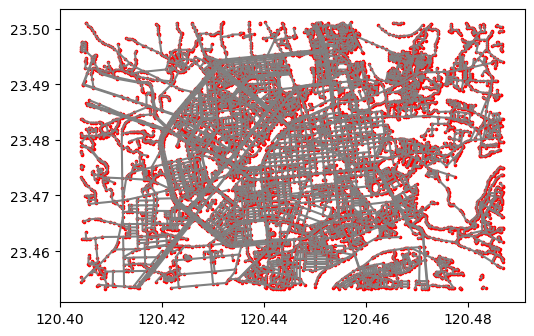

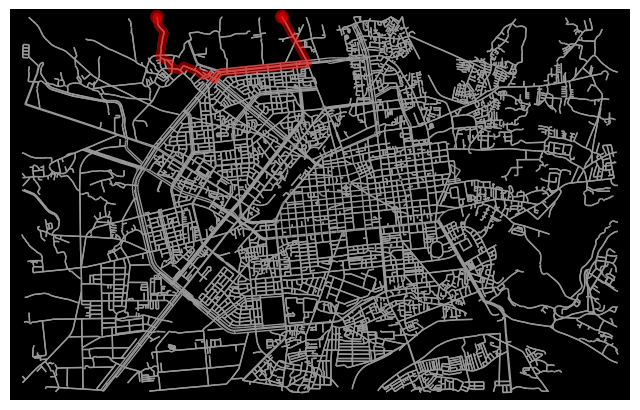

In [10]:
# author Wen-Pin Liu
# this program use pbf file do apply pathplanning
from pyrosm import OSM
from pyrosm import get_data
import osmnx as ox
import networkx as nx

# path = "/home/shiwulo/workspace/project/Minxiong.pbf" # according to your file path
path = "/home/shiwulo/workspace/project/Chiayi.pbf"

# Initialize the OSM parser object
osm = OSM(path)

nodes, edges = osm.get_network(nodes=True, network_type="driving")

# Plot nodes and edges on a map
ax = edges.plot(figsize=(6, 6), color="gray")
ax = nodes.plot(ax=ax, color="red", markersize=2.5)

# Create a graph for igraph from nodes and edges
G = osm.to_graph(nodes, edges, graph_type="networkx")
G

# Show the graph
# ox.plot_graph(G)

'''
source_address = "Bulevardi 5, Helsinki"
target_address = "Unioninkatu 40, Helsinki"

source = ox.geocode(source_address)
target = ox.geocode(target_address)
'''

source_x = 0.024 + 1.204e2
source_y = 23.552
target_x = 0.042 + 1.204e2
target_y = 23.556

# Find the closest nodes from the graph
# ox.get_nearest_node() was removes from OSMnx in v1.1.0
# So we use ox.nearest_nodes(Graph, X_Coordinate, Y_Coordinate) instead
source_node = ox.nearest_nodes(G, source_x, source_y)
target_node = ox.nearest_nodes(G, target_x, target_y)

# Here need to change the algorithm to the Dynamic A*(D*) or D* Lite or Dijkstra
route = nx.shortest_path(G, source_node, target_node, weight="length")

fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

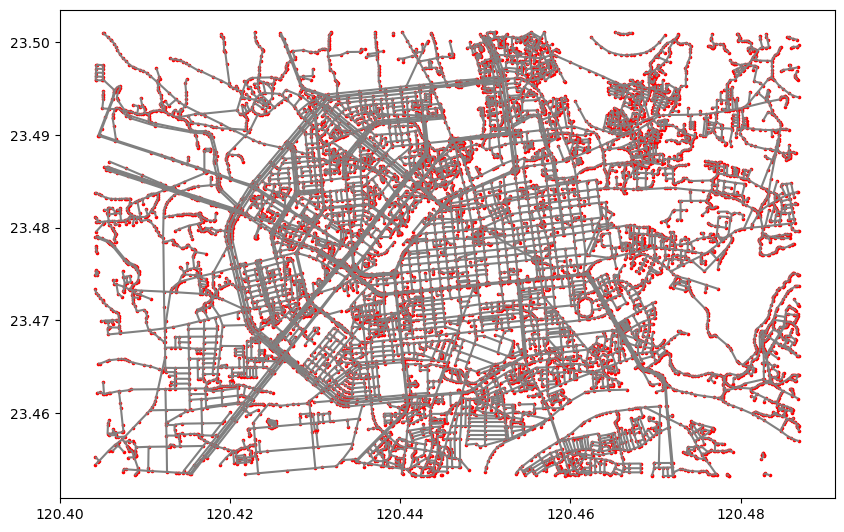

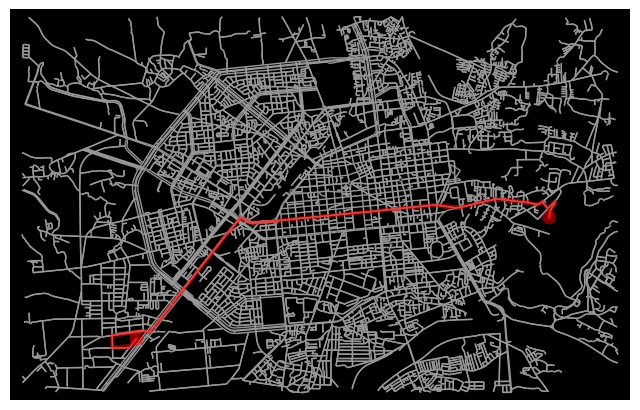

In [2]:
from pyrosm import OSM
from pyrosm import get_data
import osmnx as ox
import networkx as nx

# path = "/home/shiwulo/workspace/project/Minxiong.pbf" # according to your file path
path = "/home/shiwulo/workspace/project/Chiayi.pbf"

# Initialize the OSM parser object
osm = OSM(path)

nodes, edges = osm.get_network(nodes=True, network_type="driving")

# Plot nodes and edges on a map
ax = edges.plot(figsize=(10, 10), color="gray") # change the picture size
ax = nodes.plot(ax=ax, color="red", markersize=2.5) # node mark size

# Create a graph for igraph from nodes and edges
G = osm.to_graph(nodes, edges, graph_type="networkx")
G

# Show the graph with osmnx
# ox.plot_graph(G)

'''
source_address = "Bulevardi 5, Helsinki"
target_address = "Unioninkatu 40, Helsinki"

source = ox.geocode(source_address)
target = ox.geocode(target_address)
'''

source_x = 120.42
source_y = 23.46
target_x = 120.478
target_y = 23.4745

# Find the closest nodes from the graph
# ox.get_nearest_node() was removes from OSMnx in v1.1.0
# So we use ox.nearest_nodes(Graph, X_Coordinate, Y_Coordinate) instead
source_node = ox.nearest_nodes(G, source_x, source_y)
target_node = ox.nearest_nodes(G, target_x, target_y)

# Here need to change the algorithm to the Dynamic A*(D*) or D* Lite or Dijkstra
route = nx.shortest_path(G, source_node, target_node, weight="length")

fig, ax = ox.plot_graph_route(G, route, route_linewidth=3, node_size=0, bgcolor='k')

In [4]:
# show the edges information. 
edges.iloc[0:, -4:]

,geometry,u,v,length
0,"LINESTRING (120.44774 23.48381, 120.44791 23.4...",3237400104,307352105,98.215
1,"LINESTRING (120.44791 23.48294, 120.44798 23.4...",307352105,4599875623,47.811
2,"LINESTRING (120.44798 23.48251, 120.44807 23.4...",4599875623,2479660615,53.562
3,"LINESTRING (120.44807 23.48204, 120.44833 23.4...",2479660615,307352103,141.896
4,"LINESTRING (120.44833 23.48078, 120.44837 23.4...",307352103,4603336338,28.382
...,...,...,...,...
17554,"LINESTRING (120.48503 23.49491, 120.48452 23.4...",4433417307,953116105,68.015
17555,"LINESTRING (120.48452 23.49530, 120.48393 23.4...",953116105,1151264652,93.260
17556,"LINESTRING (120.48393 23.49594, 120.48383 23.4...",1151264652,2049301207,14.964
17557,"LINESTRING (120.48383 23.49604, 120.48370 23.4...",2049301207,4555736763,14.172
